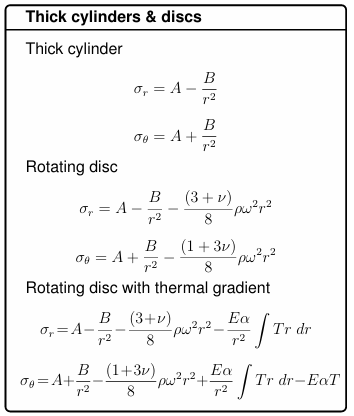

In [1]:
from math import pi,sqrt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
display(Image(filename="RD_formulae.png"))

In [2]:
Ro = 0.32 / 2 #m
Ri = 0.03 #m

rho = 7830 #kg/m3
v = .288

pressure = 85e6 #N/m2

In [3]:
B_static = -pressure / ( (1/Ro**2) - (1/Ri**2) ) #neg as pressure is compressive
A_static = B_static / Ro**2
print(f"A = {A_static:.2f}, B = {B_static:.2f}")

r = np.linspace(Ri,Ro,100)
stress_radial = np.array(A_static - B_static / r**2)
stress_hoop = np.array(A_static + B_static / r**2)
stress_axial = np.zeros(len(r))
stress = np.array([stress_radial, stress_hoop, stress_axial])
vm_stress = (1/sqrt(2)) * np.sqrt( (stress[0]-stress[1])**2 + (stress[1]-stress[2])**2 + (stress[2]-stress[0])**2 )
print(f"Von mises stress inner {vm_stress[0]/1e6:.2f}MPa")
print(f"Radial stress inner {stress_radial[0]/1e6:.2f}MPa")
print(f"Hoop stress inner {stress_hoop[0]/1e6:.2f}MPa")

A = 3097165.99, B = 79287.45
Von mises stress inner 152.62MPa
Radial stress inner -85.00MPa
Hoop stress inner 91.19MPa


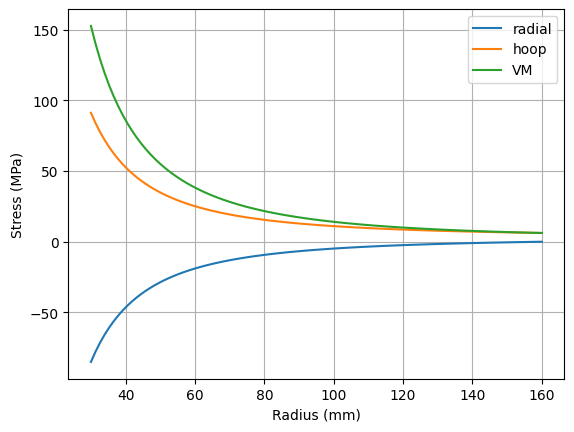

In [4]:
fig, ax = plt.subplots()
ax.plot(r*1e3,1e-6*stress_radial, label = 'radial')
ax.plot(r*1e3,1e-6*stress_hoop, label = 'hoop')
ax.plot(r*1e3,1e-6*vm_stress, label = 'VM')
ax.set_xlabel("Radius (mm)")
ax.set_ylabel("Stress (MPa)")
ax.grid()
ax.legend()

In [11]:
w = 6500 * 2*pi / 60
pressure_rot = - B_static * ( (1/Ro**2) - (1/Ri**2) ) - (1/8)*(3+v)*rho*(w**2)*(Ro**2-Ri**2)
print (f"interface pressure is {pressure_rot/1e6:.2f}MPa at {w*60/(2*pi):.2f}rpm")
print(f"change is {-(pressure - pressure_rot)/1e6:.2f}MPa")

interface pressure is 48.17MPa at 6500.00rpm
change is -36.83MPa


In [12]:
B_rot = (-pressure_rot - (1/8)*(3+v)*rho*(w**2)*(Ro**2-Ri**2)) / ( (1/Ro**2) - (1/Ri**2) )
A_rot = B_rot / Ro**2 + (1/8)*(3+v)*rho*(w**2)*(Ro**2)
print(f"A = {A_rot:.2f}, B = {B_rot:.2f}")

r = np.linspace(Ri,Ro,100)
stress_radial = np.array(A_rot - B_rot / r**2 - (1/8)*(3+v)*rho*(w**2)*r**2)
stress_hoop = np.array(A_rot + B_rot / r**2 - (1/8)*(1+3*v)*rho*(w**2)*r**2)
stress_axial = np.zeros(len(r))
stress = np.array([stress_radial, stress_hoop, stress_axial])
vm_stress = (1/sqrt(2)) * np.sqrt( (stress[0]-stress[1])**2 + (stress[1]-stress[2])**2 + (stress[2]-stress[0])**2 )
print(f"Von mises stress inner {vm_stress[0]/1e6:.2f}MPa")
print(f"Radial stress inner {stress_radial[0]/1e6:.2f}MPa")
print(f"Hoop stress inner {stress_hoop[0]/1e6:.2f}MPa")

A = 41267635.20, B = 79287.45
Von mises stress inner 158.29MPa
Radial stress inner -48.17MPa
Hoop stress inner 128.60MPa


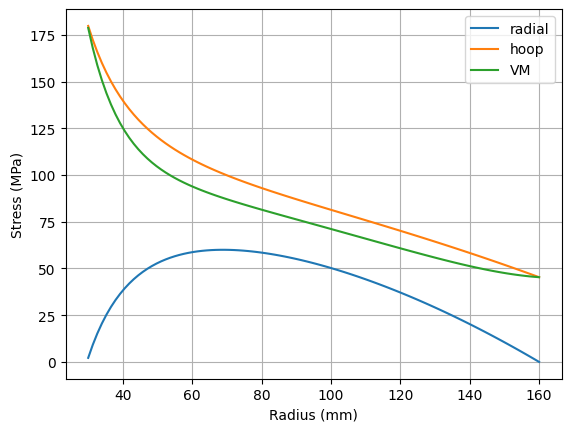

In [7]:
r = np.linspace(Ri,Ro,100)
fig, ax = plt.subplots()
ax.plot(r*1e3,1e-6*stress_radial, label = 'radial')
ax.plot(r*1e3,1e-6*stress_hoop, label = 'hoop')
ax.plot(r*1e3,1e-6*vm_stress, label = 'VM')
ax.set_xlabel("Radius (mm)")
ax.set_ylabel("Stress (MPa)")
ax.grid()
ax.legend()